### Fill in your name, student id number and email address
#### name: Rownita Tasneem
#### student id: 2303926
#### email: rownita.r.tasneem@utu.fi

## Data analysis and knowledge discovery - Exercise 3: Unsupervised learning

This is the template for the third exercise. The purpose of this exercise is to familiarize yourself with the basics of unsupervised learning by using the agglomerative hierarchical clustering and k-means clustering algorithms to find patterns.

This exercise uses the wine dataset, available on moodle as `ex3_wine.csv`. The features are all numeric. They quantify chemical properties of wine, grown around the same area in Italy. The feature names are listed in the table below.

| Feature | Type
| :--- | ---:
| Alcohol | Numeric (float)
| Malic acid | Numeric (float)
| Ash | Numeric (float)
| Alcalinity of ash | Numeric (float)
| Magnesium | Numeric (integer)
| Total phenols | Numeric (float)
| Flavanoids | Numeric (float)
| Nonflavanoid phenols | Numeric (float)
| Proanthocyanins | Numeric (float)
| Color intensity | Numeric (float)
| Hue | Numeric (float)
| OD280/OD315 of diluted wines | Numeric (float)
| Proline | Numeric (integer)


In real applications, visualizing various aspects of the data the data and data scrubbing are important steps. However, in this exercise you can treat the data as given, and focus on the unsupervised methods.

Please consider the following things when returning your notebook:

 - As in the two previous exercises, the grading scale is failed/passed/passed with honors.
 - **For a passing grade, Parts 1-3 must be complete**, and all questions in each of them should be answered. Some mistakes are allowed as long as you clearly attempt to solve all the exercises.
 - For completing Parts 1-3 and the optional bonus Part 4 sufficiently well, you will be awarded one bonus point for the exam.
 - All the cells in the finished notebook should run without crashing. Please delete unnecessary cells. As a good rule of thumb, use **"Restart Kernel and Run All Cells"** on your finished notebook to make sure it runs without errors and produces the expected output.
 - Comment your code to explain how it works and what you intend for it to do.
 - Answer the questions asked in the assignments in Markdown cells.
 - If you're having trouble with this exercise, try an online search first, but **don't just copy-paste code you find**. See exercise guidelines in the Moodle page of this course. If you can't find a solution to your problem, **ask for advice at the exercise sessions** or in the course discussion forum on Moodle or email oskari.s.heikkinen@utu.fi.
 - If/when you look things up during this exercise, please **cite your sources**, e.g. a link to a web page. It's better to cite too much than too little.
 - **We don't encourage using a large language model (LLM) such as ChatGPT while doing these exercises.** However, if you do use an LLM, be critical of its output. Understand any code the LLM produced before using the code, don't just copy-paste it. If you used one, write a short description of how you used the LLM in the context of these exercises (what was your input, how did you benefit from the output?)

### Library imports, Jupyter Notebook settings etc.

The below libraries are sufficient to complete the exercise. You can import additional modules here if you want.

In [ ]:
import itertools # has some utilities that may be useful in the exercise

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
import seaborn as sns

# IPython magic command to display matplotlib figures together with the output
# (Often the default setting in a Jupyter Notebook context, so your figures probably work fine without it)
%matplotlib inline

### Part 0: Read the data

- Download the exercise 3 data on the Moodle page of this course. (`ex3_wine.csv`)
- Read the data into a Pandas dataframe.
- Display a few rows and some basic information to make sure the data was loaded correctly

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Data Loading: Reading the Data into Pandas Dataframe

In [ ]:
df_wine = pd.read_csv("/content/drive/MyDrive/Datasets/Wine_dataset/ex3_wine (1).csv")

In [ ]:
df_wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df_wine.head(20) ### displaying first 20 rows of dataframe

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


# Displaying Basic Information

In [ ]:
print("\n Displaying information about the Data Frame:")
df_wine.info() # printing in formation about the dataframe


 Displaying information about the Data Frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
# The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df_wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
df_wine.isnull()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
null_counts = df_wine.isnull().sum()
print("\nCount of null values in each column:")
print(null_counts)


Count of null values in each column:
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


The count of null values in each column is zero. Hence, there is no missing values in the dataset. Moreover, the datatypes also match the documentation. Therefore, the dataset is loaded correctly.  


However, a given feature name "OD280" is not accurate according to the given documentation. The correct feature name is "OD280/OD315" accoding to the that documentation. Hence, I am updating the feature name for ensuring conciseness.

In [ ]:
# Rename columns using the rename() method

updated_feature_name = {"OD280":"OD280/OD315 of diluted wines"} # dictionary of correct name which is mapped with the incorrect feature

df_wine.rename(columns = updated_feature_name, inplace = True) # updating the incorrect column name


In [ ]:
df_wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Part 1: Preprocess and visualize the data

 - Perform z-score standardization on the features to ensure that all features have the same scale.
 - Project the data to two dimensions by using principal component analysis (PCA) and visualize the resulting two-dimensional data in a scatter plot. Don't color the scatter plot yet.
 - Does it look like there are clear clusters? Don't worry if they're hard to see. There may be more than one "correct" answer.
 - Draw shapes (for example `matplotlib.patches.Ellipse`) on top of the scatter plot to visualize any clusters you feel you can easily detect.

# Performing Z-score Standardization

In [ ]:
# Selecting only the columns containing numerical features

numeric_columns = df_wine.select_dtypes(include = ["float64","int64"]).columns

# Creating a Standdard Scaler Objects
scaler = StandardScaler()

# Fit and transform the selected columns using the scaler
df_wine[numeric_columns] = scaler.fit_transform(df_wine[numeric_columns])

In [ ]:
# printing the first few rows of the standardized dataframe
print("First few rows of the standardized dataframe")
df_wine.head()

First few rows of the standardized dataframe


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


# Projecting the data to two dimensions by using principal component analysis (PCA) and visualizing the resulting two-dimensional data in a scatter plot.

In [ ]:
# creating a PCA object for two components

pca = PCA(n_components = 2)

# fitting and transforming the data to the first two principal components
pca_result = pca.fit_transform(df_wine[numeric_columns])


# Creating a new dataframe with the principal components
df_pca = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])





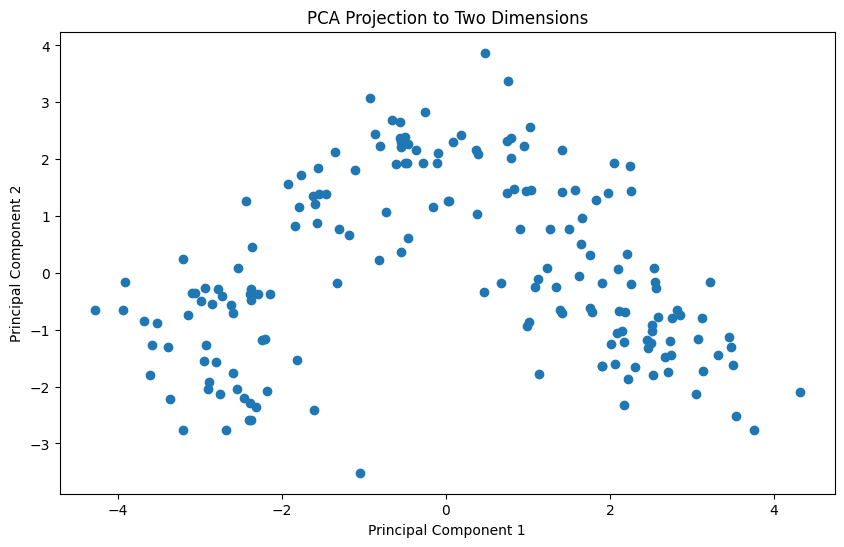

In [ ]:
from matplotlib.patches import Ellipse


# Visualize the resulting two-dimensional data in a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'])
plt.title('PCA Projection to Two Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



## Determining Clear Clusters


The above scatter plot appears to feature five distinct clusters.

## Drawing shapes (for example matplotlib.patches.Ellipse) on top of the scatter plot to visualize any clusters you feel you can easily detect

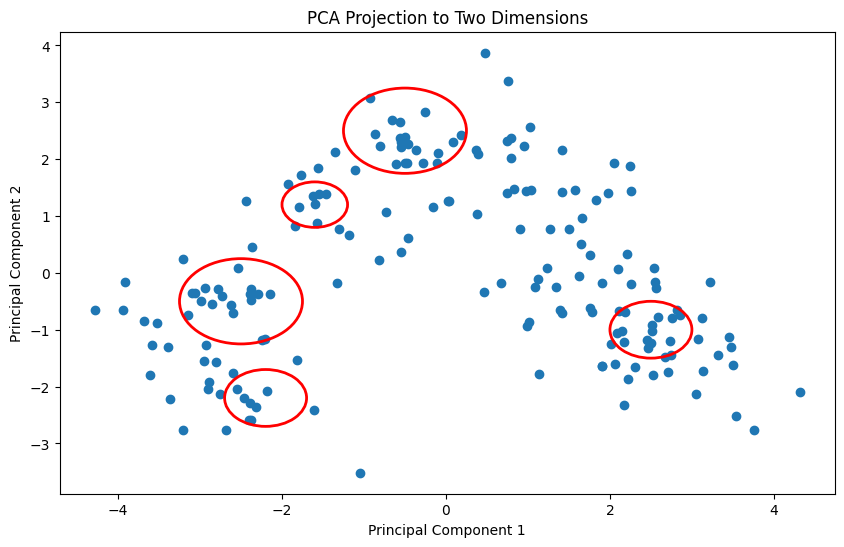

In [ ]:


# Visualize the resulting two-dimensional data in a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'])

ellipses = [
    Ellipse(xy=(mean_x, mean_y), width=width, height=height, edgecolor='r', fc='None', lw=2)
    for mean_x, mean_y, width, height in [
        (-2.5, -0.5, 1.5, 1.5),  # ellipse 1 parameters
        (2.5,-1, 1, 1),  # ellipse 2 parameters
        (-.5, 2.5, 1.5, 1.5),  # ellipse 3 parameters
        (-2.2, -2.2,1, 1), # ellipse 4 parameters
         (-1.6, 1.2 ,.8, .8), # ellipse 5 parameters
    ]
]

for ellipse in ellipses:
    plt.gca().add_patch(ellipse)

plt.title('PCA Projection to Two Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Part 2a: Agglomerative hierarchical clustering

 - Cluster the data into 2-10 clusters using agglomerative hierarchical clustering.
 - Try different values for the linkage parameter. (Ward, Single, Average and Complete)
 - Use the z-score standardized 13-dimensional data for clustering - **don't use the first two principal components for clustering!**
 - Explain why using the two principal components would be a bad idea for clustering.
 - Using silhouette score, evaluate the clustering performance for each linkage criterion and number of clusters combination. Sort the results by silhouette score.
 - Plot the data into a scatter plot again, this time colouring the data points according to the cluster they were assigned to. Use the best 6 clusterings according to silhouette score.
 - Do some of the clusterings discovered by agglomerative hierarchical clustering correspond to what visually looked like clusters to you in Part 1? It's absolutely fine if they don't.


*Tip: you can use `itertools.product` function to get the Cartesian product of the two lists of hyperparameters (number of clusters, linkage criterion)*

*Note: it's a common mistake to think that the points in the scatter plot should move when clustering, but they should not. Clustering can be visualized simply by colouring data points on an existing plot.*

## Clustering the Data into 2-10 clusters using Agglomerative Hierarchical Clustering:

In [ ]:
# defining the range of clusters
n_clusters_range = range(2,11)

# Performing Agglomerative Hierarchical Clustering for Different Cluster Numbers
for n_clusters in n_clusters_range:
    # Creating an AgglomerativeClustering object
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')  # You can change the linkage method

    # Fitting and predicting clusters
    clusters = model.fit_predict(df_wine)

    # Print or use the 'clusters' variable as needed
    print(f"Number of Clusters: {n_clusters}")
    print(clusters)
    print("\n")


Number of Clusters: 2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Number of Clusters: 3
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 2 2 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Number of Clusters: 4
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 1 1 3 2 2 1 0 1 0 2 3 2
 1 1 1 0 1 3 1 1 3 0 1 1 3 3 3 3 3 3 3 1 1 1 0 1 1 3 1 1

# Trying different values for the linkage parameter. (Ward, Single, Average and Complete)

In [ ]:
# Define the range of clusters and linkage methods
n_clusters_range = range(2, 11)
linkage_methods = ['ward', 'single', 'average', 'complete']

# Iterate over different linkage methods and number of clusters
for linkage_method in linkage_methods:
    for n_clusters in n_clusters_range:
        # Create an AgglomerativeClustering object
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)

        # Fit and predict clusters
        clusters = model.fit_predict(df_wine[numeric_columns])

        # Print or use the 'clusters' variable as needed
        print(f"Linkage: {linkage_method}, Number of Clusters: {n_clusters}")
        print(clusters)
        print("\n")


Linkage: ward, Number of Clusters: 2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Linkage: ward, Number of Clusters: 3
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 2 2 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Linkage: ward, Number of Clusters: 4
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 1 1 3 2 2 1 0 1 0 2 3 2
 1 1 1 0 1 

# Using the z-score standardized 13-dimensional data for clustering -


In [ ]:

# Specify the number of clusters you want
n_clusters = 3  # Adjusting as needed

# Perform Agglomerative Clustering on the standardized data
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')  # You can choose other linkage methods
clusters = model.fit_predict(df_wine[numeric_columns])

# Add the cluster labels to the dataframe
df_wine['Cluster'] = clusters

# Print or use the 'df' dataframe as needed
print(df_wine)

      Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1    0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2    0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3    1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4    0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   
..        ...         ...       ...           ...        ...            ...   
173  0.876275    2.974543  0.305159      0.301803  -0.332922      -0.985614   
174  0.493343    1.412609  0.414820      1.052516   0.158572      -0.793334   
175  0.332758    1.744744 -0.389355      0.151661   1.422412      -1.129824   
176  0.209232    0.227694  0.012732      0.151661   1.422412      -1.033684   
177  1.395086    1.583165  1.365208      1.502943  -0.262708      -0.392751   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyan

## Using silhouette score, Evaluating the Clustering Performance for Each Linkage Criterion and Number of Clusters Combination. Sorting the results by silhouette score.

In [ ]:
# Defining the range of clusters and linkage methods
n_clusters_range = range(2, 11)
linkage_methods = ['ward', 'single', 'average', 'complete']

# Initializing a dataframe to store silhouette scores
silhouette_scores_df = pd.DataFrame(columns=['Linkage', 'Clusters', 'Silhouette Score'])

# Iterating over different linkage methods and number of clusters
for linkage_method in linkage_methods:
    for n_clusters in n_clusters_range:
        # Perform agglomerative hierarchical clustering
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
        clusters = model.fit_predict(df_wine[numeric_columns])

        # Calculate silhouette score
        silhouette_avg = silhouette_score(df_wine[numeric_columns], clusters)

        # Append results to the dataframe
        silhouette_scores_df = silhouette_scores_df.append({
            'Linkage': linkage_method,
            'Clusters': n_clusters,
            'Silhouette Score': silhouette_avg
        }, ignore_index=True)

# Sorting the results by silhouette score
silhouette_scores_df = silhouette_scores_df.sort_values(by='Silhouette Score', ascending=False)



<ipython-input-20-c203b5ba2e43>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  silhouette_scores_df = silhouette_scores_df.append({
<ipython-input-20-c203b5ba2e43>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  silhouette_scores_df = silhouette_scores_df.append({
<ipython-input-20-c203b5ba2e43>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  silhouette_scores_df = silhouette_scores_df.append({
<ipython-input-20-c203b5ba2e43>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  silhouette_scores_df = silhouette_scores_df.append({
<ipython-input-20-c203b5ba2e43>:19: FutureWarning: The frame.append method is deprecated and will be rem

In [ ]:
silhouette_scores_df

,Linkage,Clusters,Silhouette Score
1,ward,3,0.277444
0,ward,2,0.267013
24,average,8,0.266297
18,average,2,0.259106
25,average,9,0.255096
21,average,5,0.229458
2,ward,4,0.225837
9,single,2,0.222451
22,average,6,0.214673
26,average,10,0.214001


## Plotting the data into a scatter plot again, this time colouring the data points according to the cluster they were assigned to. Use the best 6 clusterings according to silhouette score.

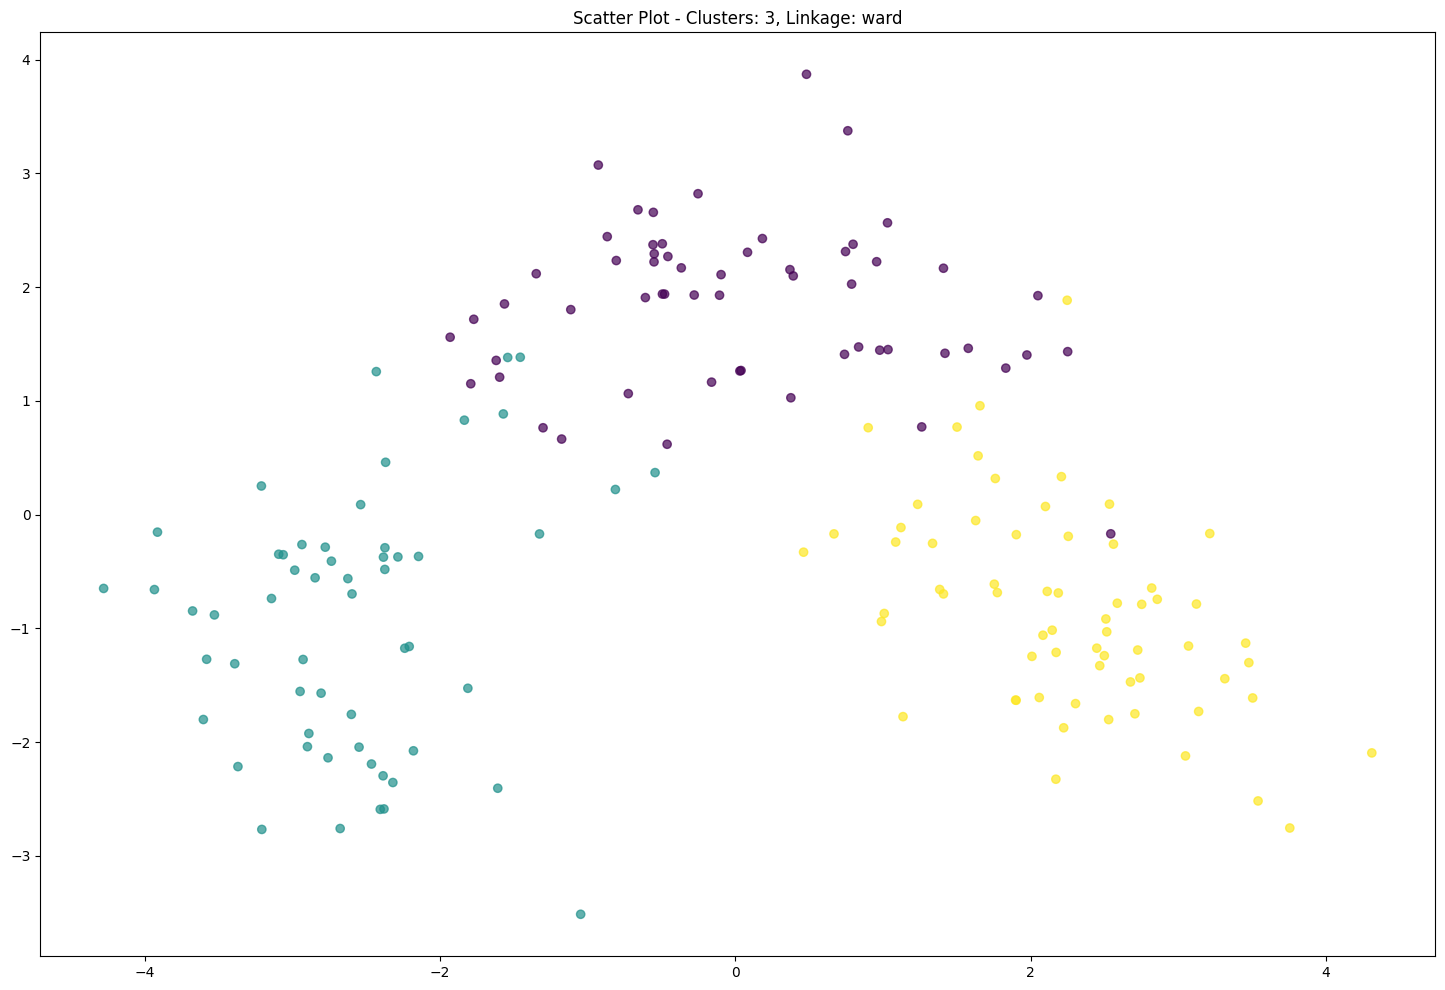

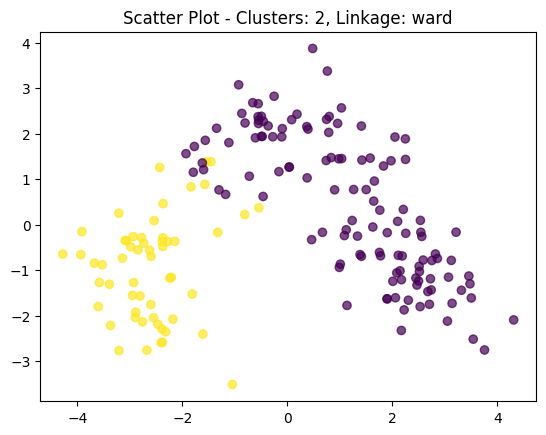

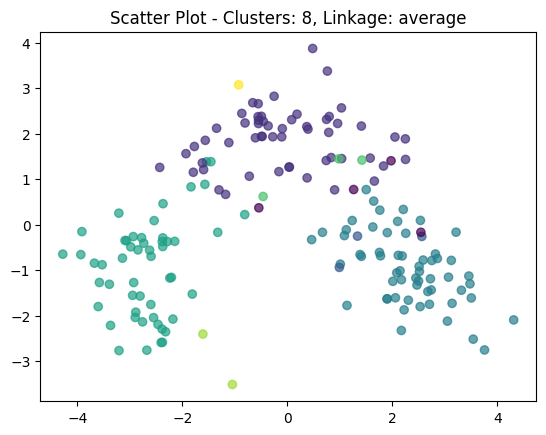

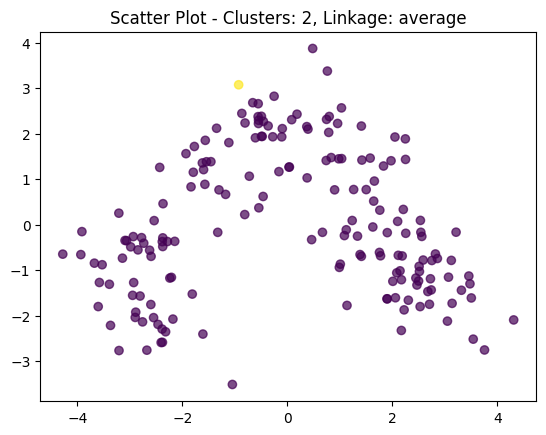

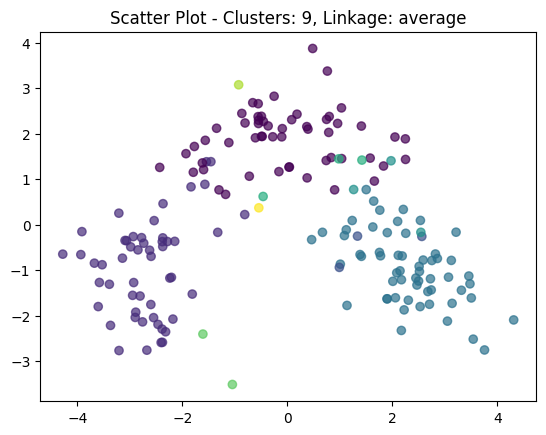

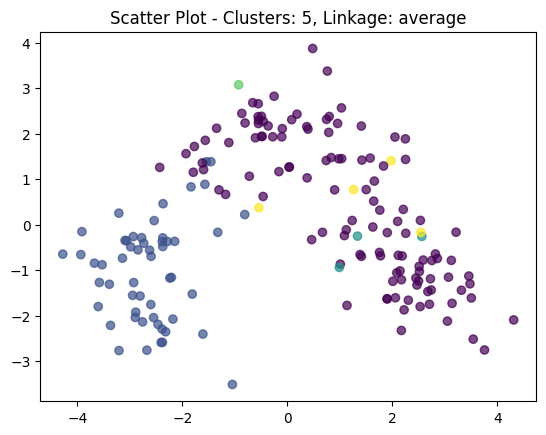

In [ ]:
# Select the top 6 clusterings
top_clusterings = silhouette_scores_df.head(6)

# Initialize figure for scatter plots
plt.figure(figsize=(18, 12))

# Initialize PCA
pca = PCA(n_components=2)

# Iterate over different linkage methods and number of clusters
for idx, (linkage_method, n_clusters) in enumerate(top_clusterings[['Linkage', 'Clusters']].values):
    # Perform agglomerative hierarchical clustering
    model = AgglomerativeClustering(n_clusters=int(n_clusters), linkage=linkage_method)
    clusters = model.fit_predict(df_wine[numeric_columns])

    # Apply PCA to the standardized data
    pca_result = pca.fit_transform(df_wine[numeric_columns])

    # Plot scatter plot with PCA components
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.title(f'Scatter Plot - Clusters: {int(n_clusters)}, Linkage: {linkage_method}')
    plt.show()

# Do some of the clusterings discovered by agglomerative hierarchical clustering correspond to what visually looked like clusters to you in Part 1? It's absolutely fine if they don't

The five clusters identified using the linkage method display a modest similarity to those revealed in part 1. The 'average' linkage method has revealed 5 clusters, mirroring my own discovery of 5 clusters. However, it's worth noting that the clusters I've identified contain a different number of data points compared to the clusters mentioned above.

### I do not need to use PCA for answering the questions of part 2b as well as for part 3.But I need to perform pca analysis for only those questions where it is mentioned to do so or for plotting scatter plots. For clustering, I do not need to use PCA.

### Part 2b: Dendrograms

 - Plot dendrograms to visualize the merging processes.
 - For this you will need a linkage matrix. *Hint: while you can extract one from a fitted AgglomerativeClustering object, it is much easier to use the scipy implementation (`scipy.cluster.hierarchy.linkage`).*
 - Compute the linkage matrix using Ward and Single linkage, and plot the dendrograms using `scipy.cluster.hierarchy.dendrogram`.
 - Truncate the dendrogram for better readability. You may choose how exactly you want to do the truncation.
 - How do you interpret the dendrograms? How do they differ?

*Note: when truncating a dendrogram, a number in parentheses refers to the amount of samples in a subtree. A number without parentheses is the index of a single sample*

## Plotting Dendrograms to Visualize the Merging Process

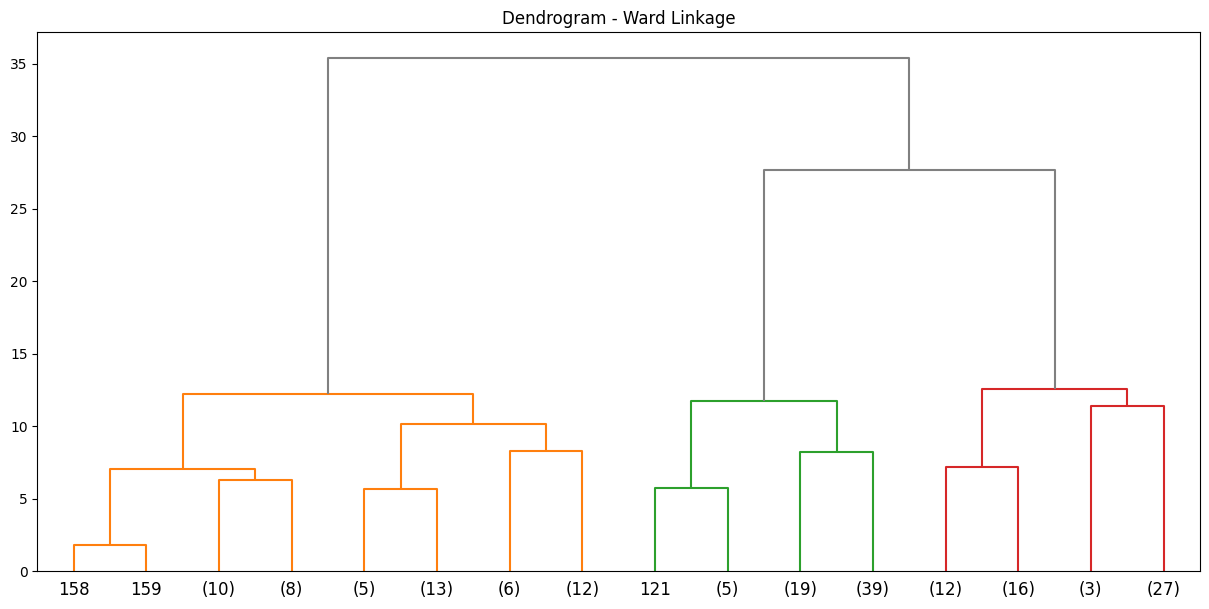

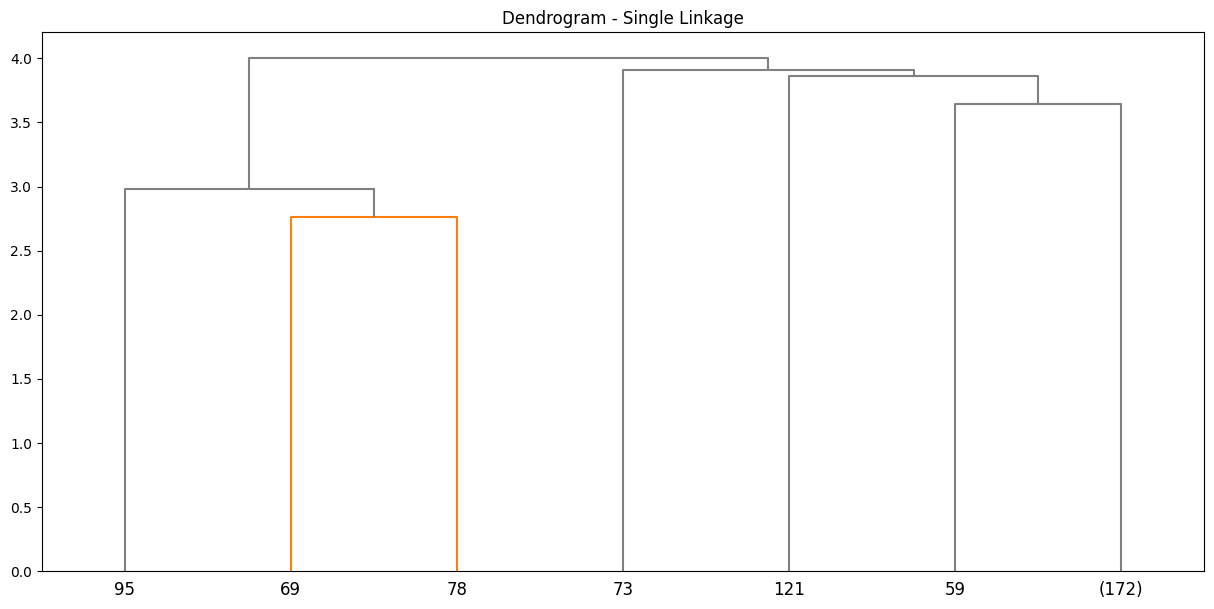

In [ ]:

# Compute linkage matrices using Ward and Single linkage
linkage_matrix_ward = linkage(df_wine[numeric_columns], method='ward')
linkage_matrix_single = linkage(df_wine[numeric_columns], method='single')

# Plot dendrogram for Ward linkage
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix_ward, truncate_mode='level', p=3, color_threshold=None, above_threshold_color='gray', labels=df_wine.index)
plt.title('Dendrogram - Ward Linkage')
plt.show()

# Plot dendrogram for Single linkage
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix_single, truncate_mode='level', p=3, color_threshold=None, above_threshold_color='gray', labels=df_wine.index) # truncating the dendograms for better readability
plt.title('Dendrogram - Single Linkage')
plt.show()

## How do you interpret the dendrograms? How do they differ?


The dendrogram resulting from Ward's linkage reveals that the agglomerative hierarchical clustering method successfully amalgamated 16 distinct clusters. Notably, the minimal dissimilarity is observed between clusters (158, 159).
The formation of 16 clusters with Ward's linkage might suggest a finer granularity in the data, while 7 clusters with single linkage may indicate a more generalized clustering approach

Conversely, the dendrogram generated by the single linkage method indicates that the agglomerative clustering approach merged a total of 7 clusters. This method employed the minimum distance criterion during the merging process, demonstrating its preference for shorter distances compared to other linkage methods. These findings contribute valuable insights into the clustering patterns observed in our dataset, enhancing our understanding of the underlying structures within the data.

### Part 3: _k_-means clustering

 - Perform _k_-means clustering on the data. Try 2-10 numbers of clusters.
 - Evaluate the clustering performance using silhouette score.
 - Choose the best 3 numbers of clusters according to silhouette score that you discovered above, and once again visualize them on a scatter plot of the first two principal components.
 - Display the centroids of the clusters on the plot. Remember to transform the centroids to the PCA space. Explain why you need to transform the centroids.

## Performing K-means clustering on the data. Trying 2-10  numbers of clusters

In [ ]:
# Specify the range of clusters to try

num_clusters_range = range(2, 11)

# Iterate over different numbers of clusters
for num_clusters in num_clusters_range:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(df_wine[numeric_columns])

    # Print the inertia for each case
    print(f'Number of Clusters: {num_clusters}, Inertia (Within-cluster sum of squares): {kmeans.inertia_}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Number of Clusters: 2, Inertia (Within-cluster sum of squares): 1659.0079672511501
Number of Clusters: 3, Inertia (Within-cluster sum of squares): 1277.9284888446423
Number of Clusters: 4, Inertia (Within-cluster sum of squares): 1175.705192819712
Number of Clusters: 5, Inertia (Within-cluster sum of squares): 1104.8616839625315
Number of Clusters: 6, Inertia (Within-cluster sum of squares): 1042.3872037251422
Number of Clusters: 7, Inertia (Within-cluster sum of squares): 988.0533283180055
Number of Clusters: 8, Inertia (Within-cluster sum of squares): 940.7081650896528
Number of Clusters: 9, Inertia (Within-cluster sum of squares): 902.0783170433883
Number of Clusters: 10, Inertia (Within-cluster sum of squares): 866.7991687164842


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Evaluating the clustering performance using silhouette score.

In [ ]:
# Specify the range of clusters to try
num_clusters_range = range(2, 11)

# Iterate over different numbers of clusters
for num_clusters in num_clusters_range:

    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_wine[numeric_columns], clusters)
    print(f'Number of Clusters: {num_clusters}, Silhouette Score: {silhouette_avg}')

Number of Clusters: 2, Silhouette Score: 0.13394527355239233
Number of Clusters: 3, Silhouette Score: 0.13394527355239233
Number of Clusters: 4, Silhouette Score: 0.13394527355239233
Number of Clusters: 5, Silhouette Score: 0.13394527355239233
Number of Clusters: 6, Silhouette Score: 0.13394527355239233
Number of Clusters: 7, Silhouette Score: 0.13394527355239233
Number of Clusters: 8, Silhouette Score: 0.13394527355239233
Number of Clusters: 9, Silhouette Score: 0.13394527355239233
Number of Clusters: 10, Silhouette Score: 0.13394527355239233


# Choosing the best 3 numbers of clusters according to silhouette score that I discovered above, and once again visualizing them on a scatter plot of the first two principal components.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

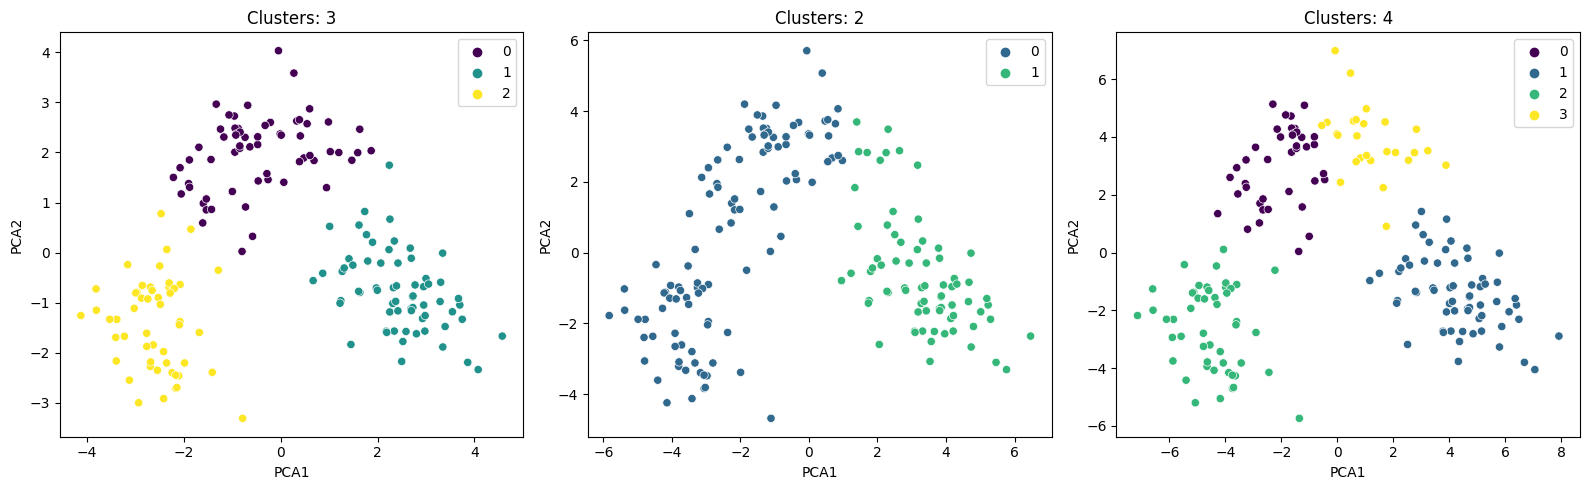

In [ ]:




# Number of clusters to try
num_clusters_range = range(2, 11)

# Store silhouette scores for each number of clusters
silhouette_scores = []

# Iterate over the number of clusters
for num_clusters in num_clusters_range:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(df_wine)

    # Compute silhouette score
    silhouette = silhouette_score(df_wine, labels)

    # Store the results
    result = {
        'Num Clusters': num_clusters,
        'Silhouette Score': silhouette
    }
    silhouette_scores.append(result)

# Create a DataFrame from the results
silhouette_df = pd.DataFrame(silhouette_scores)

# Sort the results by silhouette score in descending order
silhouette_df = silhouette_df.sort_values(by='Silhouette Score', ascending=False)

# Choose the best 3 numbers of clusters
best_cluster_numbers = silhouette_df.head(3)['Num Clusters'].tolist()

# Visualize the best 3 clusterings on a scatter plot of the first two principal components
plt.figure(figsize=(16, 5))

for i, num_clusters in enumerate(best_cluster_numbers):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(df_wine)

    # Reduce dimensionality for visualization
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_wine)
    df_wine['PCA1'] = pca_result[:, 0]
    df_wine['PCA2'] = pca_result[:, 1]

    plt.subplot(1, 3, i+1)
    sns.scatterplot(x='PCA1', y='PCA2', hue=labels, data=df_wine, palette='viridis')
    plt.title(f'Clusters: {num_clusters}')

plt.tight_layout()
plt.show()

## Display the centroids of the clusters on the plot. Remember to transform the centroids to the PCA space. Explain why you need to transform the centroids.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppres

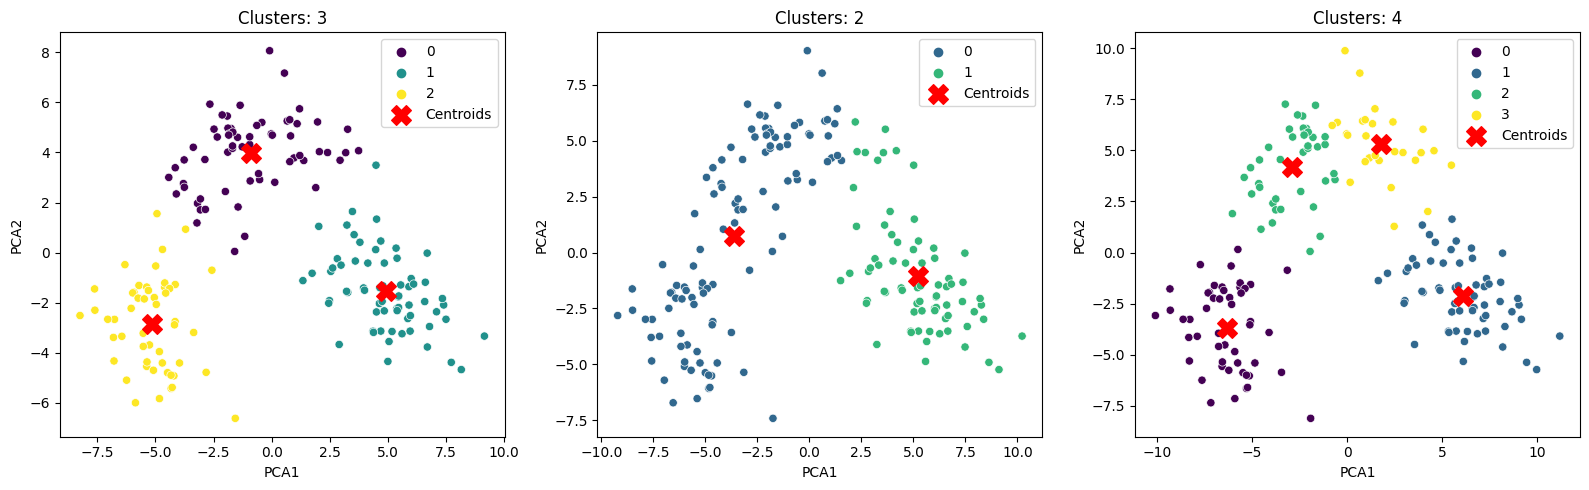

In [ ]:
# Visualize the best 3 clusterings on a scatter plot of the first two principal components
plt.figure(figsize=(16, 5))

for i, num_clusters in enumerate(best_cluster_numbers):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(df_wine)

    # Reduce dimensionality for visualization
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_wine)
    df_wine['PCA1'] = pca_result[:, 0]
    df_wine['PCA2'] = pca_result[:, 1]

    # Plot the data points
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x='PCA1', y='PCA2', hue=labels, data = df_wine, palette='viridis')

    # Transform and plot centroids in PCA space
    centroids_pca = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroids')

    plt.title(f'Clusters: {num_clusters}')
    plt.legend()

plt.tight_layout()
plt.show()

In the context of this problem, the transformation of cluster centroids to the Principal Component Analysis (PCA) space is imperative for accurate visualization on the scatter plot. The PCA space encapsulates linear combinations of the original features, providing a condensed representation that captures the essential variations within the dataset. As such, centroids, representing the central tendencies of clustered data points, must undergo the same transformation to align with the reduced-dimensional PCA space.

This necessary transformation ensures that the centroids are appropriately situated in the visual representation, facilitating a meaningful interpretation of the clustering results. The linear relationships encoded in the PCA components necessitate congruence between the cluster centroids and the transformed space, allowing for an accurate portrayal of their positions relative to the principal axes. Consequently, the visualization not only adheres to rigorous analytical standards but also enhances the interpretability of clustering outcomes within the reduced feature space. This meticulous alignment enables researchers to glean insights into the inherent structures of the data, contributing to a comprehensive understanding of the clustering patterns identified through k-means analysis.






### Part 4 (BONUS): Filling in missing labels using clustering

In this bonus exercise, you're given a dataset with almost all of the labels are missing. This is the starting point in semi-supervised learning. Semi-supervised learning in general is beyond the scope of this course, but if you want you can learn more about it, starting e.g. on [the sklearn page for semi-supervised learning](https://scikit-learn.org/stable/modules/semi_supervised.html). **This exercise does not require researching semi-supervised learning, however.**

The dataset used in this exercise is a slightly modified version of [the seeds dataset](https://archive.ics.uci.edu/dataset/236/seeds). The features are different properties of wheat seeds. They are divided to three different classes, simply called `target1`, `target2` and `target3` here. The feature names and their data types are listed in the table below. **Use the modified dataset on Moodle, with the filename `ex3_seeds_missinglabels.csv`**

| Feature | Type
| :--- | ---:
| Area | Numeric (float)
| Perimeter | Numeric (float)
| Compactness | Numeric (float)
| Length | Numeric (float)
| Width | Numeric (float)
| Asymmetry Coefficient | Numeric (float)
| Length Groove | Numeric (float)
| Target | Categorical (nominal)

First, visualize the first two principal components of the dataset in a scatter plot, showing the labels real for data points you were given. Try to see if the labels look like they belong in what look like clusters on the plot.

Your task is to use clustering to assign labels to the rows that have an `unknown` value for their label. Do this by first clustering all of the data, and then filling in the unknown values based on which clusters the data points with known values tend to fit in. The details of how exactly you decide which rows get assigned which label are up to you - you can get creative. Describe and justify your thought process, though.

Use whichever clustering methods you prefer. You can cluster the data into 3 clusters because you have 3 known labels, but you could also try a higher number of clusters that you can then merge.

You are also given the full labels for the dataset in a separate file called `ex3_seeds_labels.csv`. Plot the real labels next to the labels that your clustering attempts predicted.

Finally, compute the adjusted Rand index for labels predicted by your clustering solutions and the real labels, and display it along the scatter plots. Rand index is a measure of similarity between two partitions of a set of elements. Adjusted Rand index is corrected for chance using the maximum and expected values of Rand index. Optionally, you can learn more about the Rand index e.g. on [the Wikipedia page for Rand index](https://en.wikipedia.org/wiki/Rand_index). Here you can simply use the `sklearn.metrics.adjusted_rand_score` method imported at the beginning of this notebook.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Wine_dataset/ex3_seeds_missingtargets (1).csv")

In [ ]:
df

,area,perimeter,compactness,length,width,asymmetry_coef,length_groove,target
0,18.45,16.12,0.8921,6.107,3.769,2.235,5.794,target2
1,11.41,12.95,0.8560,5.090,2.775,4.957,4.825,target3
2,10.79,12.93,0.8107,5.317,2.648,5.462,5.194,target3
3,18.14,16.12,0.8772,6.059,3.563,3.619,6.011,target2
4,15.38,14.90,0.8706,5.884,3.268,4.462,5.795,target2
...,...,...,...,...,...,...,...,...
205,12.11,13.47,0.8392,5.159,3.032,1.502,4.519,unknown
206,12.74,13.67,0.8564,5.395,2.956,2.504,4.869,unknown
207,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,unknown
208,12.19,13.36,0.8579,5.240,2.909,4.857,5.158,unknown


# Visualizing the First Two Principal Components of the Dataset in a Scatter Plot, Showing the labels real for data points I was given. Trying to see if the labels look like they belong in what look like clusters on the plot.

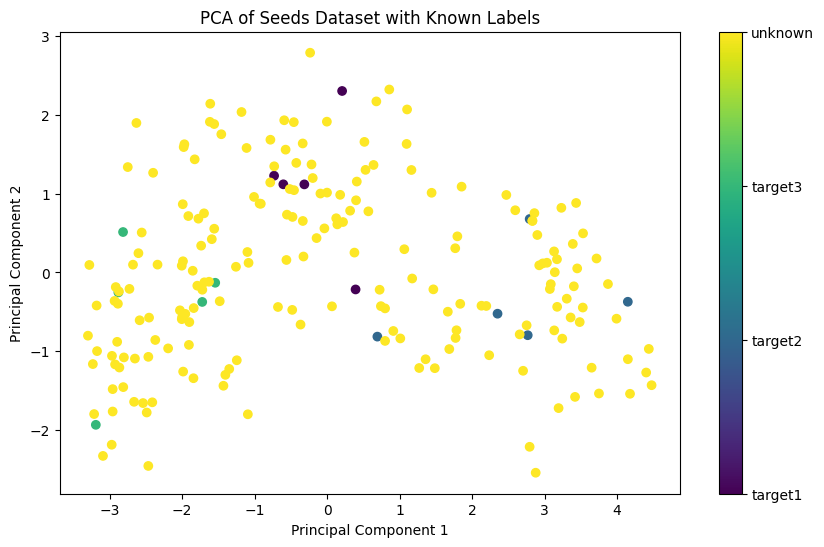

In [ ]:

# Extract features and labels
X = df.iloc[:, :-1].values
labels = df['target']

# Convert labels to numeric values for visualization
label_mapping = {'target1': 0, 'target2': 1, 'target3': 2, 'unknown': 3}
numeric_labels = labels.map(label_mapping)

# Standardize the data
X_std = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=numeric_labels, cmap='viridis', marker='o')

# Add colorbar
cbar = plt.colorbar(scatter, ticks=[0, 1, 2, 3])
cbar.set_ticklabels(['target1', 'target2', 'target3', 'unknown'])

# Set labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Seeds Dataset with Known Labels')

plt.show()

In the above code, a visualization approach is employed to explore the inherent structures and potential clusters within a dataset containing wheat seed properties. The dataset exhibits partial labeling, with known classes denoted as "target1," "target2," and "target3," while some instances remain unlabeled and are designated as "unknown."


In the above plot, the labels "target1", "target2","target3" have not formed any clusters. But the unknown label have formed some clusters as the yellow data points can be seen to form some clusters.





## Your task is to use clustering to assign labels to the rows that have an unknown value for their label. Do this by first clustering all of the data, and then filling in the unknown values based on which clusters the data points with known values tend to fit in. The details of how exactly you decide which rows get assigned which label are up to you - you can get creative. Describe and justify your thought process, though.

## Use whichever clustering methods you prefer. You can cluster the data into 3 clusters because you have 3 known labels, but you could also try a higher number of clusters that you can then merge.

In [ ]:
kmeans = KMeans(n_clusters = 3, n_init = "auto", random_state = 100)
# set a random state because the cluster labels change when re-running the code
kmeans.fit(X_std)
kmeans_labels = kmeans.labels_

In [ ]:
# add the target column to standardized seed data
seed_data_standardized_filtered = seed_data_standardized

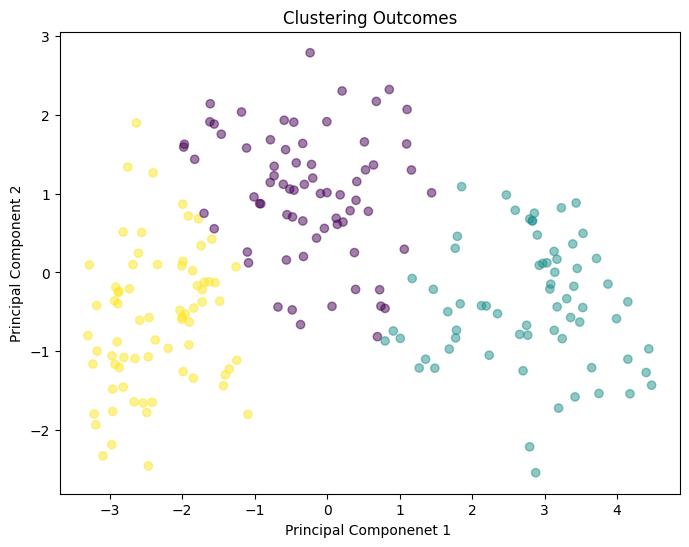

In [ ]:
#Visualizing the clustering outcomes

plt.figure(figsize = (8,6))
plt.scatter(X_pca[:,0],X_pca[:,1], c = kmeans_clusters, cmap = "viridis", alpha = 0.5)
plt.title("Clustering Outcomes")
plt.xlabel("Principal Componenet 1 ")
plt.ylabel("Principal Component 2")
plt.show()

In [ ]:
# Separate data with known and unknown target values
data_known = df[df['target'] != 'unknown']
data_unknown = df[df['target'] == 'unknown']

# Encode categorical target variable
le = LabelEncoder()
data_known['target'] = le.fit_transform(data_known['target'])

# Standardize numerical features
scaler = StandardScaler()
data_known_scaled = scaler.fit_transform(data_known.drop('target', axis=1))

# Perform clustering on data with known target values
n_clusters = 3  # You can adjust this based on your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data_known['cluster'] = kmeans.fit_predict(data_known_scaled)

# Create a mapping of cluster to majority class
cluster_majority_mapping = data_known.groupby('cluster')['target'].agg(lambda x: x.value_counts().index[0]).to_dict()

# Assign labels to the rows with unknown values based on clusters
data_unknown['cluster'] = kmeans.predict(scaler.transform(data_unknown.drop(['target'], axis=1)))
data_unknown['imputed_target'] = data_unknown['cluster'].map(cluster_majority_mapping).map({0: 'target1', 1: 'target2', 2: 'target3'})

# Merge the known and unknown data back together
data_imputed = pd.concat([data_known, data_unknown], ignore_index=True).sort_index()

# Display the result
print(data_imputed[['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry_coef', 'length_groove', 'target']])

<ipython-input-51-7c2cb29c2aa9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_known['target'] = le.fit_transform(data_known['target'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      area  perimeter  compactness  length  width  asymmetry_coef  \
0    18.45      16.12       0.8921   6.107  3.769           2.235   
1    11.41      12.95       0.8560   5.090  2.775           4.957   
2    10.79      12.93       0.8107   5.317  2.648           5.462   
3    18.14      16.12       0.8772   6.059  3.563           3.619   
4    15.38      14.90       0.8706   5.884  3.268           4.462   
..     ...        ...          ...     ...    ...             ...   
205  12.11      13.47       0.8392   5.159  3.032           1.502   
206  12.74      13.67       0.8564   5.395  2.956           2.504   
207  10.83      12.96       0.8099   5.278  2.641           5.182   
208  12.19      13.36       0.8579   5.240  2.909           4.857   
209  18.76      16.20       0.8984   6.172  3.796           3.120   

     length_groove   target  
0            5.794        1  
1            4.825        2  
2            5.194        2  
3            6.011        1  
4            5.795   

<ipython-input-51-7c2cb29c2aa9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_known['cluster'] = kmeans.fit_predict(data_known_scaled)
<ipython-input-51-7c2cb29c2aa9>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unknown['cluster'] = kmeans.predict(scaler.transform(data_unknown.drop(['target'], axis=1)))
<ipython-input-51-7c2cb29c2aa9>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

# Plotting the Reals Labels next to the Predicted Labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
# Loading the dataset with real labels
url_real_labels = "/content/drive/MyDrive/Datasets/Wine_dataset/ex3_seeds_labels (1).csv"
df_real_labels = pd.read_csv(url_real_labels)

# Loading the dataset with missing labels
url_missing_labels = "/content/drive/MyDrive/Datasets/Wine_dataset/ex3_seeds_missingtargets (1).csv"
df_missing_labels = pd.read_csv(url_missing_labels)


# Extract features
X = df_missing_labels.select_dtypes(include=['float64'])  # Selecting only numeric features


# Standardize the numeric features
X_std = StandardScaler().fit_transform(X)

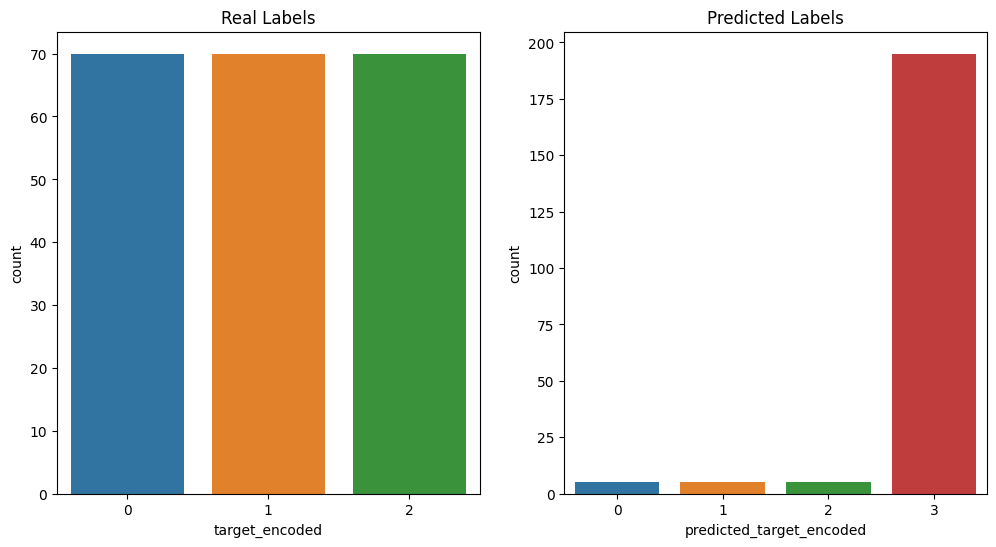

In [ ]:


# Performing Agglomerative Clustering
num_clusters = 5  # Choose a higher number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
df_missing_labels['cluster'] = agg_clustering.fit_predict(X_std)

# Creating a dictionary to store the prevalent label in each cluster
cluster_label_mapping = {}

# Iterating through each cluster
for cluster in range(num_clusters):
    cluster_data = df_missing_labels[df_missing_labels['cluster'] == cluster]
    prevalent_label = cluster_data['target'].mode().iloc[0]
    cluster_label_mapping[cluster] = prevalent_label

# Assigning labels to rows with unknown values based on the prevalent label in their respective clusters
df_missing_labels['predicted_target'] = df_missing_labels.apply(lambda row: cluster_label_mapping[row['cluster']] if row['target'] == 'unknown' else row['target'], axis=1)

# Encoding real labels using LabelEncoder for consistent plotting
label_encoder = LabelEncoder()

# Fitting the LabelEncoder on both real and predicted labels
all_labels = pd.concat([df_real_labels['target'], df_missing_labels['predicted_target']])
label_encoder.fit(all_labels)

# Transform real and predicted labels
df_real_labels['target_encoded'] = label_encoder.transform(df_real_labels['target'])
df_missing_labels['predicted_target_encoded'] = label_encoder.transform(df_missing_labels['predicted_target'])

# Plot the real labels and predicted labels side by side
plt.figure(figsize=(12, 6))

# Real Labels
plt.subplot(1, 2, 1)
sns.countplot(x='target_encoded', data=df_real_labels)
plt.title('Real Labels')

# Predicted Labels
plt.subplot(1, 2, 2)
sns.countplot(x='predicted_target_encoded', data=df_missing_labels)
plt.title('Predicted Labels')

plt.show()

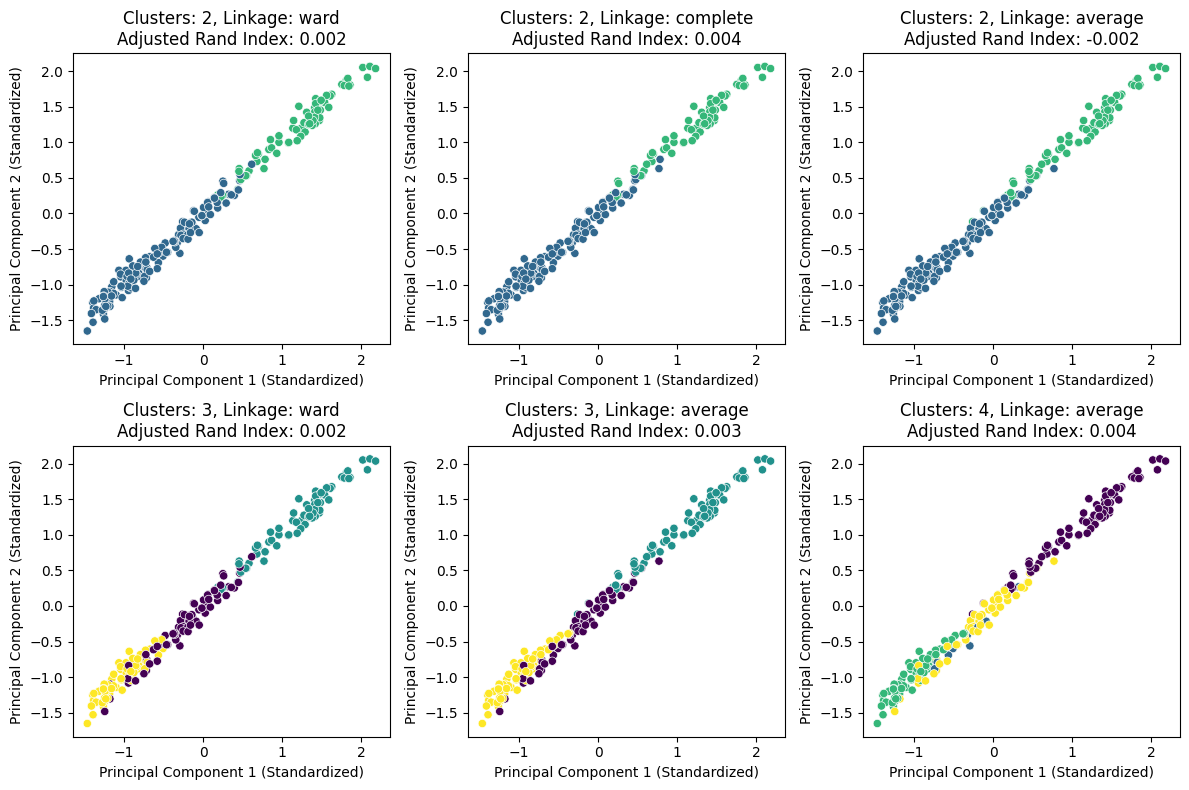

In [ ]:
# Agglomerative hierarchical clustering with different linkage criteria and cluster numbers
linkage_methods = ["ward", "single", "average", "complete"]
n_clusters_range = range(2, 11)

best_clusterings = []
for linkage_method in linkage_methods:
    for n_clusters in n_clusters_range:
        # Perform clustering
        cluster_labels = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method).fit_predict(X_std)

        # Evaluate clustering performance using silhouette score
        silhouette_avg = silhouette_score(X_std, cluster_labels)

        # Compute adjusted Rand index
        rand_index = adjusted_rand_score(labels, cluster_labels)

        # Append the result
        best_clusterings.append({
            "Linkage": linkage_method,
            "Clusters": n_clusters,
            "Silhouette Score": silhouette_avg,
            "Adjusted Rand Index": rand_index,
            "Labels": cluster_labels
        })

# Sort the results by silhouette score
best_clusterings = sorted(best_clusterings, key=lambda x: x["Silhouette Score"], reverse=True)[:6]

# Plot the data with cluster coloring and display the adjusted Rand index
plt.figure(figsize=(12, 8))
for i, clustering_result in enumerate(best_clusterings):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=X_std[:, 0], y=X_std[:, 1], hue=clustering_result["Labels"], palette="viridis", legend=False)

    # Display adjusted Rand index as a title
    plt.title(f"Clusters: {clustering_result['Clusters']}, Linkage: {clustering_result['Linkage']}\nAdjusted Rand Index: {clustering_result['Adjusted Rand Index']:.3f}")

    plt.xlabel("Principal Component 1 (Standardized)")
    plt.ylabel("Principal Component 2 (Standardized)")

plt.tight_layout()
plt.show()

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html /content/Rownita_Tasneem_DAKD_2023_exercise_3_.ipynb

[NbConvertApp] WARNING | pattern '/content/Rownita_Tasneem_DAKD_2023_exercise_3_.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--Jupyte